In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 31.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow_decision_forests as tfdf

# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
dataset_df = pd.read_excel("Data-RF.xlsx")

In [ ]:
# Map categorical grades to numerical values
label = "Grade"
grade_mapping = {'A': 5, 'A-': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0}
dataset_df[label] = dataset_df[label].map(grade_mapping)

In [ ]:
# Define function to split dataset
def split_dataset(dataset, test_ratio=0.3):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

# Split dataset into training and testing sets
train_df, test_df = split_dataset(dataset_df)

In [ ]:
# Drop rows with missing values in the label column
train_df = train_df.dropna(subset=['Grade'])


In [ ]:
# Train Random Forest model
random_forest_model = tfdf.keras.RandomForestModel(
    verbose=2,
    categorical_algorithm="CART",
    num_trees=30,
    max_depth=16
)
random_forest_model.fit(
    tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Grade", task=tfdf.keras.Task.CLASSIFICATION)
)

Use 2 thread(s) for training
Use /tmp/tmpl0x10xcx as temporary training directory


Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=float64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Att

[INFO 24-02-12 17:56:10.9156 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 17:56:10.9156 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 17:56:10.9156 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 17:56:10.9157 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 17:56:10.9157 UTC kernel.cc:392] Number of examples: 193
[INFO 24-02-12 17:56:10.9158 UTC data_spec_inference.cc:305] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 17:56:10.9159 UTC kernel.cc:792] Tra

Model trained in 0:00:00.050130
Compiling model...
Model compiled.


[INFO 24-02-12 17:56:10.9537 UTC decision_forest.cc:660] Model loaded with 30 root(s), 900 node(s), and 5 input feature(s).
[INFO 24-02-12 17:56:10.9537 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-02-12 17:56:10.9537 UTC kernel.cc:1061] Use fast generic engine


In [ ]:
# Train Gradient Boosted Trees model
gradient_boosted_trees_model = tfdf.keras.GradientBoostedTreesModel(
    verbose=2,
    categorical_algorithm="CART",
    num_trees=30,
    max_depth=16
)
gradient_boosted_trees_model.fit(
    tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Grade", task=tfdf.keras.Task.CLASSIFICATION)
)

Use 2 thread(s) for training
Use /tmp/tmpaszrf6oa as temporary training directory


Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=float64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Att

[INFO 24-02-12 17:56:18.2310 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 17:56:18.2310 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 17:56:18.2310 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 17:56:18.2312 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 17:56:18.2312 UTC kernel.cc:392] Number of examples: 193
[INFO 24-02-12 17:56:18.2312 UTC data_spec_inference.cc:305] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 17:56:18.2313 UTC kernel.cc:792] Tra

Model trained in 0:00:00.623089
Compiling model...
Model compiled.


In [ ]:
# Visualize the first tree in the Random Forest model
tfdf.model_plotter.plot_model_in_colab(random_forest_model, tree_idx=0, max_depth=3)

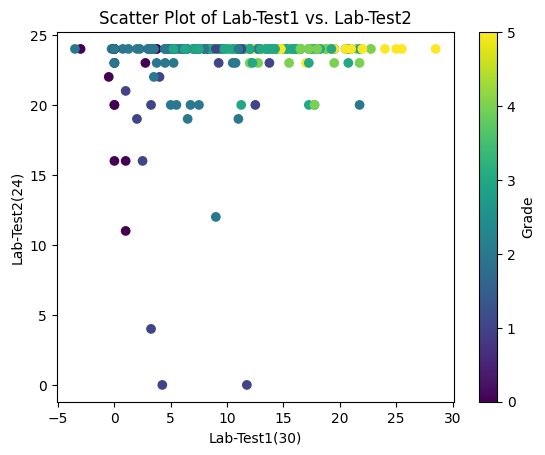

In [ ]:
import matplotlib.pyplot as plt

# Plot scatter plot for Lab-Test1 vs. Lab-Test2
plt.scatter(dataset_df['Lab-Test1(30)'], dataset_df['Lab-Test2(24)'], c=dataset_df['Grade'])
plt.xlabel('Lab-Test1(30)')
plt.ylabel('Lab-Test2(24)')
plt.title('Scatter Plot of Lab-Test1 vs. Lab-Test2')
plt.colorbar(label='Grade')
plt.show()

In [ ]:
# Evaluate Gradient Boosted Trees model
evaluation_gbdt = gradient_boosted_trees_model.make_inspector().evaluation()

In [ ]:
# Evaluate Random Forest model
evaluation_rf = random_forest_model.make_inspector().evaluation()


In [ ]:
# Print evaluation results
print("Evaluation Results for Gradient Boosted Trees:")
print(evaluation_gbdt)

print("Evaluation Results for Random Forest:")
print(evaluation_rf)



Evaluation Results for Gradient Boosted Trees:
Evaluation(num_examples=None, accuracy=0.9545454382896423, loss=0.1600211262702942, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)
Evaluation Results for Random Forest:
Evaluation(num_examples=193, accuracy=0.8808290155440415, loss=0.6269628387427083, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)


In [ ]:
random_forest_model.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=66, accuracy=0.7575757575757576, loss=8.737854928681344, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=192, accuracy=0.8697916666666666, loss=1.8623874358211954, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=193, accuracy=0.8808290155440415, loss=0.9768186826548428, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=30, evaluation=Evaluation(num_examples=193, accuracy=0.8808290155440415, loss=0.6269628387427083, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None))]

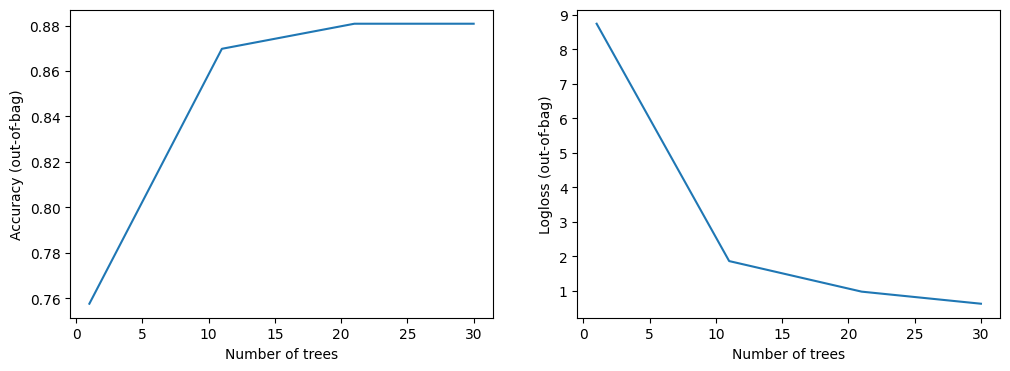

In [68]:
import matplotlib.pyplot as plt

logs = random_forest_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

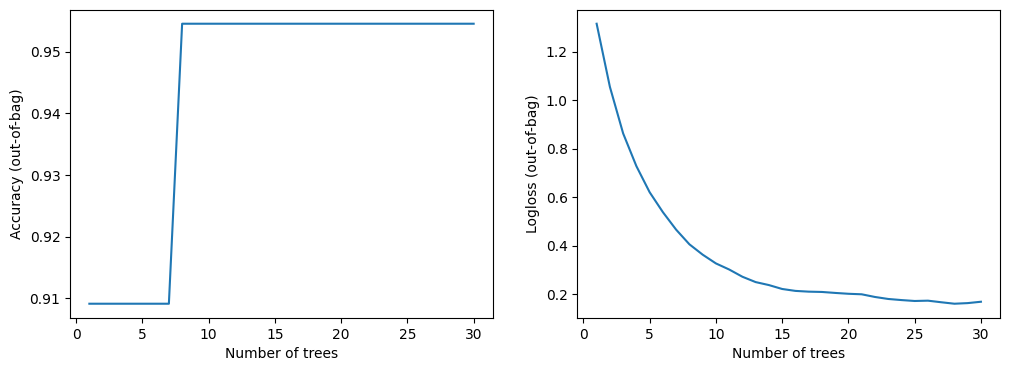

In [69]:
logs = gradient_boosted_trees_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()